In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from basis import lprior

N_st=4

#beta=100
ground = (10.,.5,.1,.05,1,.1)
ground = (5.,.25,.1,.05,1,.1)
ground = (200,1,2,1)

In [2]:
def filename(met,ground):
    return 'inference/2S_{}_inference_beta={}.csv'.format(met,ground[0])
    return 'inference/STS_{}_inference_beta={}-{}.csv'.format(met,ground[0],ground[1])

def prior(x):
    return np.exp([lprior(np.array((xi))) for xi in x])

In [3]:
def conf_int(sam,conf=95):
    res = []
    for i in range(sam.shape[1]):
        sam_i = sam[:,i]
        conf_i =(np.percentile(sam_i,(100-conf)/2),
                  np.percentile(sam_i,(100+conf)/2))
        res.append(conf_i)
    return tuple(res)

In [4]:
def stats(sam):
    mean = sam.mean(axis=0)
    conf_50 = conf_int(sam,50)
    conf_95 = conf_int(sam)
    return mean,conf_50,conf_95

In [5]:
def x_lim(bins):
    return [bins[0],bins[-1]] + np.array((-.1,.05))*(bins[-1]-bins[0])

In [6]:
def hist(ax,sam,bins,label):
    g = []
    for (axi,i) in zip(ax,range(sam.shape[1])): 
        g.append(axi.hist(sam[:,i],bins=bins[i],density=True))
        axi.set_xlim(x_lim(bins[i]))
    
    meanb,c50b,c95b = stats(sam)

    if label:
        ax[0].axvline(ground[0],color='k', label = 'gt')
        for i in range(1,N_st):
            ax[i].axvline(ground[i],color='k')    
        
        ax[0].axvline(meanb[0],color='y',label = 'expected')
        for i in range(1,N_st):
            ax[i].axvline(meanb[i],color='y')
    
        ax[0].fill_between(c50b[0],(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.5,label='50%confidence')
        ax[0].fill_between((c95b[0][0],c50b[0][0]),(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.2,label='95%confidence')
        ax[0].fill_between((c95b[0][1],c50b[0][1]),(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.2)
    else:
        for i in range(N_st):
            ax[i].axvline(ground[i],color='k')
            ax[i].axvline(meanb[i],color='y')       

        ax[0].fill_between(c50b[0],(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.5)
        ax[0].fill_between((c95b[0][0],c50b[0][0]),(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.2)
        ax[0].fill_between((c95b[0][1],c50b[0][1]),(0,0),(g[0][0].max(),g[0][0].max()),color='r',alpha=.2)
        
    for i in range(1,N_st):
        ax[i].fill_between(c50b[i],(0,0),(g[i][0].max(),g[i][0].max()),color='r',alpha=.5)
        ax[i].fill_between((c95b[i][0],c50b[i][0]),(0,0),(g[i][0].max(),g[i][0].max()),color='r',alpha=.2)
        ax[i].fill_between((c95b[i][1],c50b[i][1]),(0,0),(g[i][0].max(),g[i][0].max()),color='r',alpha=.2)



In [7]:
    
def make_graphs_2():
    met_labels = ('IEU','IMU','RK','KRY')
    met_axis =  ('J-MJP','R-MJP','RK4','KRY')
    met_sam = [pd.read_csv(filename(met,ground)).to_numpy() for met in met_labels]

    fig,ax = plt.subplots(4,N_st,figsize=(16,8))

    bins = []
    for i in range(N_st):
        bins.append(np.linspace(met_sam[-1][:,i].min(),met_sam[-1][:,i].max(),25))
    
    
    label=True
    for (axi,sam) in zip(ax,met_sam):
        hist(axi,sam,bins,label)
        label=False

    for (axi,method) in zip(ax,met_axis):
        axi[0].set_ylabel(method)

    parameters_label = [r'$\beta_R$',r'$\beta_P$',r'$\lambda_{act}$',r'$\lambda_{ina}$',r'$\gamma_R$',r'$\gamma_P$']
    for i in range(N_st):
        ax[-1][i].set_xlabel(parameters_label[i],fontsize=18)

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
    fig.tight_layout()

    fig.savefig('fig4/fig_beta={}.png'.format(ground[0]),dpi=300,bbox_inches="tight")

    [print(str(stats(sam)[1])+'/n')for sam in met_sam]

((200.27788942858345, 204.12784880509008), (1.007081229381372, 1.0286354040665415), (1.9046645298159088, 1.9698034801887987), (0.935202746765932, 0.9828419066549746), (-30545.21194525395, -30540.4454634434), (-32671.134500521293, -32571.60872021197))/n
((196.4565199383799, 200.4238721356484), (0.9846053378537885, 1.0074125084280436), (1.884510280139708, 1.9432439498114715), (0.92595081807687, 0.9679926645635636), (-30546.19480173116, -30544.48168172512))/n
((196.42882560315192, 200.44917882026343), (0.9845037402077405, 1.007546669695772), (1.8845241566839284, 1.9437130193891172), (0.9260649381739796, 0.9682300654098968), (-30546.220155987787, -30544.481552855665))/n
((196.58836295563464, 200.6293500908608), (0.985915561071004, 1.0091555074657443), (1.8824006675131384, 1.9408126385980773), (0.9236185119736962, 0.9656543258814492), (-30548.517380206387, -30546.799320830847))/n


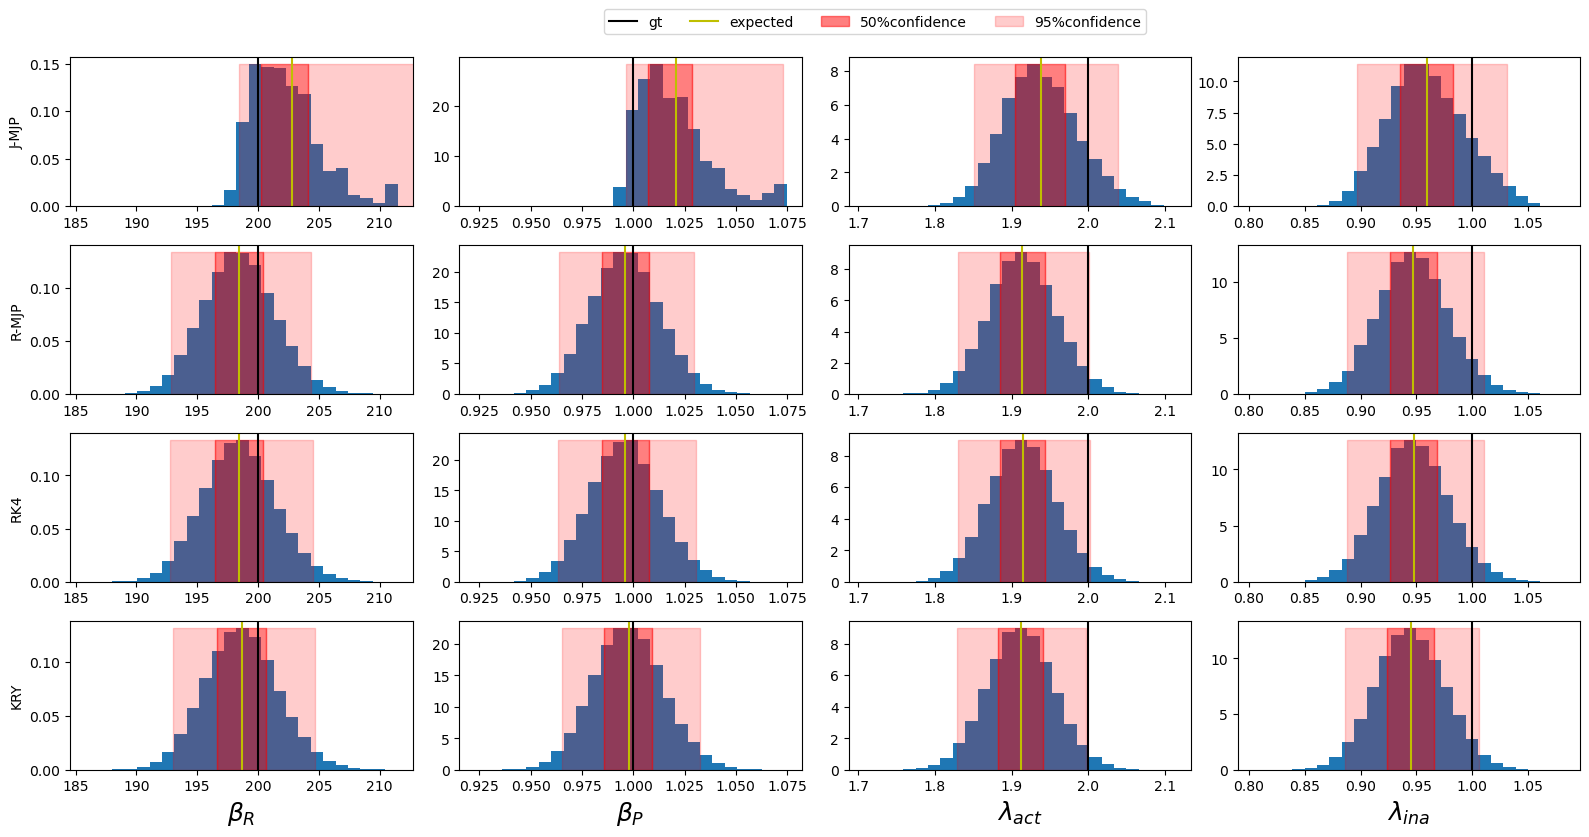

In [8]:
make_graphs_2()

In [9]:
def autocorrelation(x):
    N = x.size
    mean = x.mean()
    xc = x-mean
    var = xc.var()

    k_array = np.arange(N/2,dtype=int)
    den = np.array([ (xc[:N-k]*xc[k:]).mean() for k in k_array])
    return den/var

In [10]:
def AC_graphs_2():
    met_labels = ('IEU','IMU','RK','KRY')
    met_axis = ('J-MJP','R-MJP','RK4','Krylov')
    met_sam = [(pd.read_csv(filename(met,ground)).to_numpy()[:,:N_st]) for met in met_labels] ##change

    fig,ax = plt.subplots(len(met_sam),N_st,figsize=(16,6))


    label=True
    for (axi,sam) in zip(ax,met_sam):
        [axi[i].plot(autocorrelation(sam[:,i])) for i in range(N_st)]
        label=False

    for (axi,method) in zip(ax,met_axis):
        axi[0].set_ylabel(method)
    
    #for i in range(4):
        #xlim = ax[0][i].get_xlim
        #ax[0][i].set_xlim(0,50000)
        #ax[1][i].set_xlim(0,50000)

    #parameters_label = [r'$\beta$',r'$\gamma$',r'$\lambda_{act}$',r'$\lambda_{ina}$']
    parameters_label = [r'$\beta_R$',r'$\beta_P$',r'$\lambda_{act}$',r'$\lambda_{ina}$',r'$\gamma_R$',r'$\gamma_P$']
    for i in range(N_st):
        ax[-1][i].set_xlabel(parameters_label[i],fontsize=18)
    fig.supylabel('Autocorrelation')

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
    fig.tight_layout()

    fig.savefig('fig4/ac_beta_corr={}.png'.format(ground[0]),dpi=300,bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


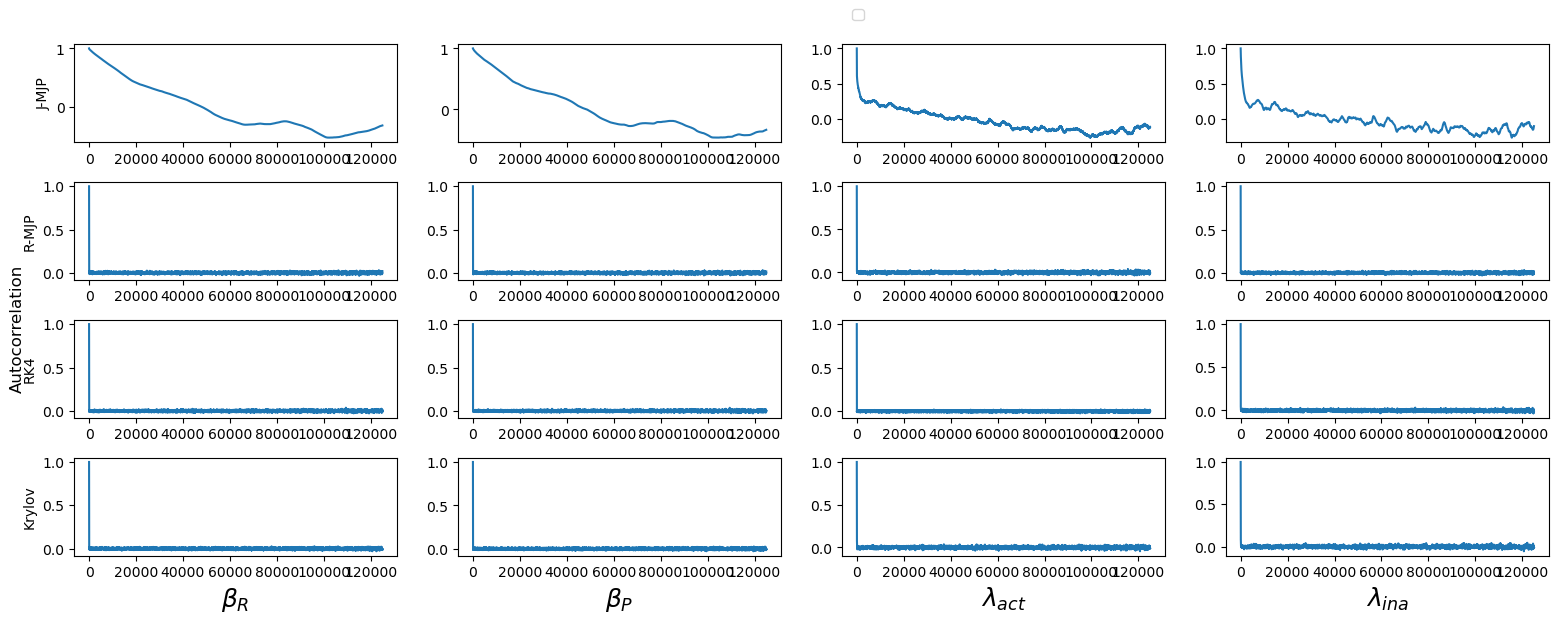

In [11]:
#beta=100
AC_graphs_2()

In [12]:
def burnin_filename(met,ground):
    return 'burn/2S_{}_inference_beta={}.csv'.format(met,ground[0])
    return 'inference/STS_{}_inference_beta={}-{}.csv'.format(met,ground[0],ground[1])
met = 'IEU'
ll = np.vstack((pd.read_csv(burnin_filename(met,ground)).to_numpy(),pd.read_csv(filename(met,ground)).to_numpy()))

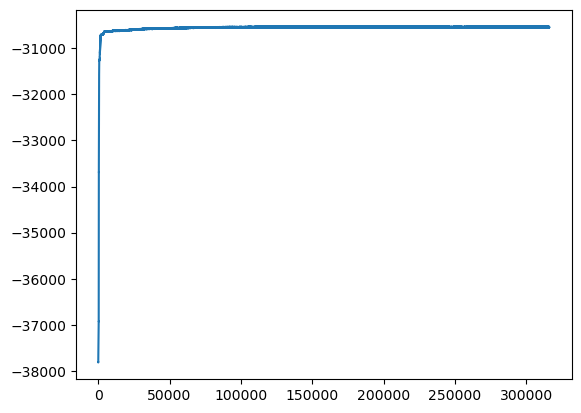

In [13]:
plt.plot(ll[:,-2:-1].sum(axis=1))

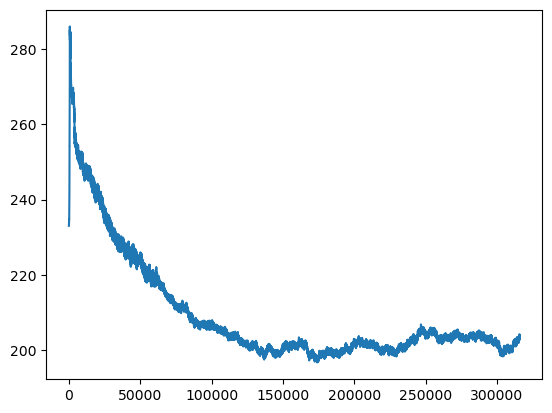

In [14]:
plt.plot(ll[:,:1].sum(axis=1))

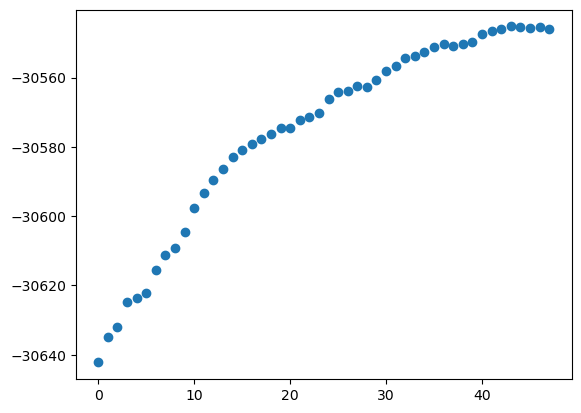

In [15]:
t = [ll[2000*i:2000*(i+1),-2:-1].sum(axis=1).mean() for i in range(2,50)]
plt.scatter(np.arange(len(t)),t)

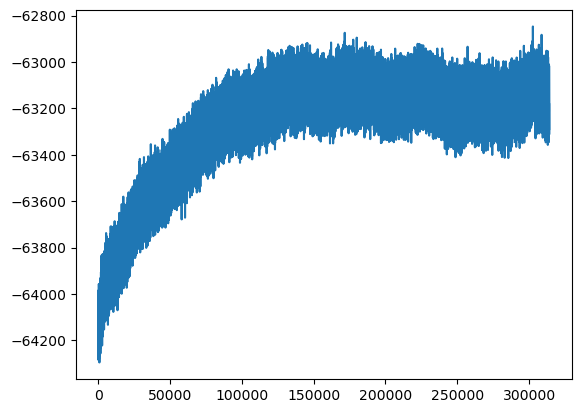

In [21]:
plt.plot(ll[2000:,-2:].sum(axis=1))

In [19]:
ll

array([[ 2.33027880e+02,  1.50015834e+00,  1.50000217e+00,
         1.49976676e+00, -3.78134802e+04, -3.35835513e+04],
       [ 2.33027880e+02,  1.50015834e+00,  1.50000217e+00,
         1.49976676e+00, -3.78148602e+04, -3.35244921e+04],
       [ 2.33027880e+02,  1.50015834e+00,  1.50000217e+00,
         1.49976676e+00, -3.78106444e+04, -3.35508650e+04],
       ...,
       [ 2.03487370e+02,  1.02095312e+00,  1.90613707e+00,
         9.57536204e-01, -3.05433819e+04, -3.27686527e+04],
       [ 2.03487370e+02,  1.02095312e+00,  1.90613707e+00,
         9.57536204e-01, -3.05437535e+04, -3.26513532e+04],
       [ 2.03487370e+02,  1.02095312e+00,  1.90613707e+00,
         9.57536204e-01, -3.05433972e+04, -3.26384851e+04]])

In [23]:
np.logspace(.5,2,101)

array([  3.16227766,   3.27340695,   3.38844156,   3.50751874,
         3.63078055,   3.75837404,   3.89045145,   4.02717034,
         4.16869383,   4.31519077,   4.46683592,   4.62381021,
         4.78630092,   4.95450191,   5.12861384,   5.30884444,
         5.49540874,   5.68852931,   5.88843655,   6.09536897,
         6.30957344,   6.53130553,   6.76082975,   6.99841996,
         7.2443596 ,   7.49894209,   7.76247117,   8.03526122,
         8.31763771,   8.60993752,   8.91250938,   9.22571427,
         9.54992586,   9.88553095,  10.23292992,  10.59253725,
        10.96478196,  11.35010816,  11.74897555,  12.16186001,
        12.58925412,  13.03166778,  13.48962883,  13.96368361,
        14.45439771,  14.96235656,  15.48816619,  16.03245391,
        16.59586907,  17.17908387,  17.7827941 ,  18.40772001,
        19.05460718,  19.72422736,  20.41737945,  21.1348904 ,
        21.87761624,  22.64644308,  23.44228815,  24.26610095,
        25.11886432,  26.00159563,  26.91534804,  27.86